# HubMap- Hacking the Kidney
#### Goal - Mapping the human body at function tissue unit level - detect glomeruli FTUs in kidney

#### Implementation of Kaggle Notebook - Innovation Prize Winner - Deep Flash2 
#### Convert anatomical structure segmentations from json to masks (.zarr files)

Link - https://www.kaggle.com/matjes/hubmap-zarr

###### Step 1 - Install useful libraries

In [1]:
import cv2, zarr, tifffile
import matplotlib.pyplot as plt, numpy as np, pandas as pd
from pathlib import Path

In [3]:
def read_image(image_id, path, scale=None, verbose=1):
    "Load images with ID from path" 
    try: 
        image = tifffile.imread(path/f"train/{image_id}.tiff")
    except:
        image = tifffile.imread(path/f"test/{image_id}.tiff")
    
    if len(image.shape) == 5:
        image = image.squeeze().transpose(1, 2, 0)
    elif image.shape[0] == 3:
        image = image.transpose(1, 2, 0)
    
    if verbose:
        print(f"[{image_id}] Image shape: {image.shape}")
    
    if scale:
        new_size = (image.shape[1] // scale, image.shape[0] // scale)
        image = cv2.resize(image, new_size)
        
        if verbose:
            print(f"[{image_id}] Resized Image shape: {image.shape}")
        
    return image

###### Step 2 - Set basepaths

In [18]:
scale = 2

basepath = Path(r'C:\Users\soodn\Downloads\Naveksha\Kaggle HuBMAP\Data\hubmap_colon_data\Colon_data_reprocessed\Colon_data_reprocessed')
df_train = pd.read_csv(basepath/"train.csv")
df_sample = pd.read_csv(basepath/"sample_submission.csv")
g_out = zarr.group(f'test_images_scale{scale}')

In [19]:
df_sample

,id,predicted
0,CL_HandE_1234_B004_bottomleft,NaN
1,HandE_B005_CL_b_RGB_bottomleft,NaN


In [20]:
df_sample = df_sample.rename(columns={"predicted":"encoding"})
#df_train = df_train[df_train.id != 'HandE_B005_CL_b_RGB_topright']

###### Step 3 - Repeat for all images

[CL_HandE_1234_B004_bottomleft] Image shape: (4536, 4704, 3)
[CL_HandE_1234_B004_bottomleft] Resized Image shape: (2268, 2352, 3)
Name               : /CL_HandE_1234_B004_bottomleft
Type               : zarr.core.Array
Data type          : uint8
Shape              : (2268, 2352, 3)
Chunk shape        : (567, 588, 2)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 16003008 (15.3M)
No. bytes stored   : 14541802 (13.9M)
Storage ratio      : 1.1
Chunks initialized : 32/32



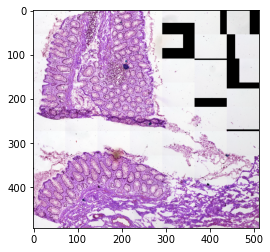

[HandE_B005_CL_b_RGB_bottomleft] Image shape: (4536, 4704, 3)
[HandE_B005_CL_b_RGB_bottomleft] Resized Image shape: (2268, 2352, 3)
Name               : /HandE_B005_CL_b_RGB_bottomleft
Type               : zarr.core.Array
Data type          : uint8
Shape              : (2268, 2352, 3)
Chunk shape        : (567, 588, 2)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 16003008 (15.3M)
No. bytes stored   : 14896206 (14.2M)
Storage ratio      : 1.1
Chunks initialized : 32/32



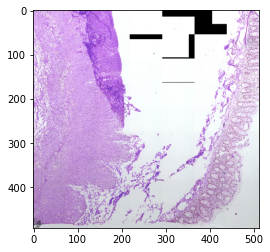

[CL_HandE_1234_B004_bottomleft] Image shape: (4536, 4704, 3)
[CL_HandE_1234_B004_bottomleft] Resized Image shape: (2268, 2352, 3)
Name               : /CL_HandE_1234_B004_bottomleft
Type               : zarr.core.Array
Data type          : uint8
Shape              : (2268, 2352, 3)
Chunk shape        : (567, 588, 2)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 16003008 (15.3M)
No. bytes stored   : 14541802 (13.9M)
Storage ratio      : 1.1
Chunks initialized : 32/32



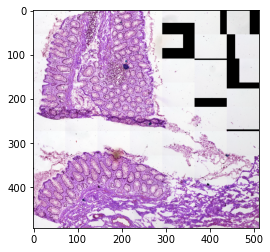

[HandE_B005_CL_b_RGB_bottomleft] Image shape: (4536, 4704, 3)
[HandE_B005_CL_b_RGB_bottomleft] Resized Image shape: (2268, 2352, 3)
Name               : /HandE_B005_CL_b_RGB_bottomleft
Type               : zarr.core.Array
Data type          : uint8
Shape              : (2268, 2352, 3)
Chunk shape        : (567, 588, 2)
Order              : C
Read-only          : False
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 16003008 (15.3M)
No. bytes stored   : 14896206 (14.2M)
Storage ratio      : 1.1
Chunks initialized : 32/32



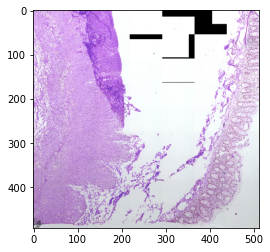

In [21]:
for idx in df_sample['id'].tolist()+df_sample['id'].tolist():
    img = read_image(idx, basepath, scale=scale)
    g_out[idx] = img
    print(g_out[idx].info)
    shape = g_out[idx].shape
    
    plt.imshow(cv2.resize(img, dsize=(512, 512*shape[0]//shape[1])))
    plt.show()